# Scenario
* You are tasked with investigating customer churn
    * churn: when a customer quits a service.  High churn rate = bad for business.
* in the `data/` folder is a the dataset you will be working on. 


# Complete the following
* Find features that are high indicators of churn and build visualizations
* Build a model to predict churn. You can build any model you want including
    * Logistic Regression 
    * KNN
    * Bayesian Classifiers
* Choose an evaluation metric for your model
    * Accuracy vs Precision vs Recall vs F1
* Explain why you chose that Metric
* Apply a GridsearchCV to find the best hyper parameters for your model
* After you build your final model you must have
    * A confusion matrix supporting your model
    * Final Metric Score
* Make sure you have a validation set for your data


# Can you
* Work in groups? Yes
* Ask cohort-mates for help/advice? Yes
* Check what you did with a cohort-mate? Yes
* Ask me for advice? Yes

This is an opportunity to practice some ML before the Phase 3 project. 


## things to remember
* A data scientist is good at finding key insights to problems not just building models
* validate your model with a confusion matrix and have a validation set

# Setting the random state
Below we set a default random state for all randomized computations.

In [2]:
random_state = 42

# Data Validation
In this section we will import and inspect the data to ensure that our data is complete, correctly encoded, and 

## Validation Reports
Below we inspect the data using some standard reports 

In [3]:
import pandas as pd

df = pd.read_csv('data/Churn_Modelling.csv', index_col='RowNumber')
print(df.info())
for column in df.columns:
    if df[column].dtype == object:
        print(f"\n== {column}==")
        print(df[column].value_counts())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB
None

== Surname==
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Pritchard     1
Vagin   

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Validation Conclusions
* The data is complete. 
* We will drop `CustomerId` and `Surname` from the model since they are unlikely to contain any meaningful information.
* We need to dummify `Gender` and `Geography`.

# Holding out Test data for model validation.
In this section, we split the provided data into a training set, which will be used for training and cross validation, and a test set, which will be used for model validation. We will use 20% of our data for validation and 80% for training.

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

# Checking for class imbalance

In [5]:
y_train.value_counts(normalize=True)

0    0.7945
1    0.2055
Name: Exited, dtype: float64

# Building our pipeline
In this section we build a pipeline.

In [11]:
# Pipline
from imblearn.pipeline import Pipeline

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction 
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration

# Resampler
from imblearn.over_sampling import SMOTE

# Model evaluation
from sklearn.metrics import plot_confusion_matrix

# Base estimator
from sklearn.base import BaseEstimator

class DummyEstimator(BaseEstimator):
    pass

numerical_features = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

categorical_features = [
    'Geography',
    'Gender'
]

pass_features = [
    'HasCrCard',
    'IsActiveMember'
]

drop_features = [
    'CustomerId',
    'Surname'
]



pipeline = Pipeline(
    steps=[
        ('preprocessor', ColumnTransformer(transformers=[
            ('numericalPreprocessor', StandardScaler(), numerical_features),
            ('categoricalPreprocessor', OneHotEncoder(drop='first', dtype=int), categorical_features),
            ('passProcessor', 'passthrough', pass_features),
            ('dropProcessor', 'drop', drop_features)
        ])),
        ('dimensionReduction', PCA()),
        ('resampler', 'passthrough' ), #SMOTE(random_state=random_state)),
        ('classifier', 'passthrough')
    ]
)

In [13]:
Xt = pipeline.fit_transform(X_train, y_train)
#encoded_features = pipeline.named_steps['preprocessor'].named_transformers_['categoricalPreprocessor'].get_feature_names()
#column_names = numerical_features + list(encoded_features) + pass_features
#dfXt = pd.DataFrame(Xt, columns= column_names)
dfXt = pd.DataFrame(Xt)
dft = pd.concat([dfXt, y_train], axis=1)
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,Exited
0,1.560225,-1.043779,-0.663217,0.379550,-0.653646,-0.364653,0.613646,0.035395,-0.500711,-0.068856,0.204248,NaN
1,-0.110237,-0.923206,0.067733,0.935077,-1.215373,1.114909,0.585941,-0.001109,-0.622554,-0.035953,-0.328364,NaN
2,-0.874293,0.147017,-0.115590,-1.740083,-0.925766,-0.306585,0.169714,-0.598228,0.544873,-0.616914,-0.206959,0.0
3,-1.045795,-2.042400,-0.215509,-1.175940,-0.050722,-0.106658,-0.666493,0.105379,0.043437,-0.317047,0.426455,1.0
4,-1.537591,-0.453465,1.972704,-0.208413,1.711438,0.144468,0.006679,-0.657921,0.480194,0.596326,0.465641,NaN


/home/schart/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  


<Figure size 432x288 with 0 Axes>

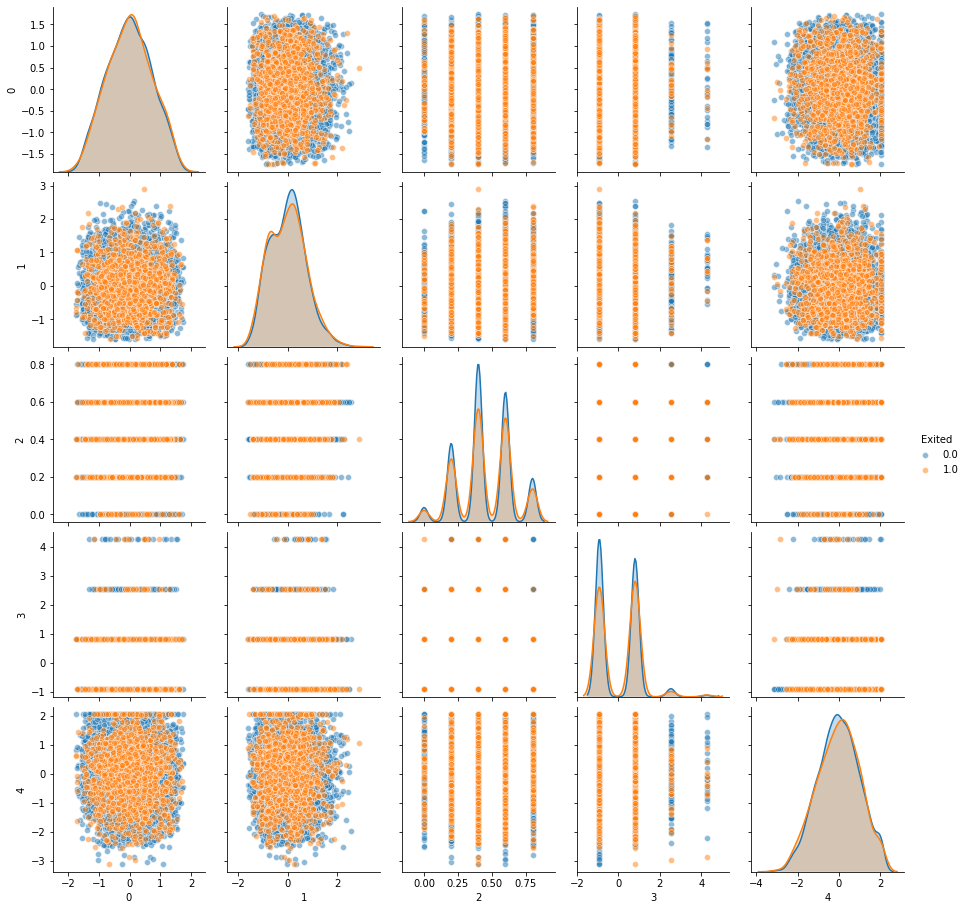

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(dft, hue='Exited', plot_kws={'alpha': 0.5})
plt.savefig('ChurnPairPlotFA.png', bb_inches='tight')

# Grid Search
We chose to score our models on recall since identifying users who are likely to leave is the primary concern.

In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from xgboost import XGBClassifier
# Scoriing
from sklearn.metrics import f1_score
parameter_grid = [
    {
        'classifier': [XGBClassifier()],
        'classifier__max_depth': [1, 2, 3],
        'classifier__n_classifiers': [100, 50, 20, 5]
    }
]
grid_search = GridSearchCV(pipeline, parameter_grid, n_jobs=-1, scoring='roc_auc')

# Finding the best model

In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numericalPreprocessor',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'EstimatedSalary']),
                                                                        ('categoricalPreprocessor',
                                                                         OneHotEncoder(drop='first',
                             

## Best Model

In [16]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericalPreprocessor',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('categoricalPreprocessor',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>),
                                                  ['Geography', 'Gender']),
                                                 ('passProcessor',
                                                  'passthrough',
                                                  ['HasCrCard',
                          

# Best model recall

In [17]:
grid_search.best_score_

0.8586772109235431

## Confusion matrix for best model

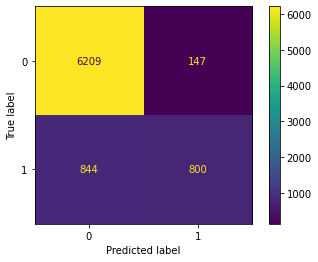

In [18]:
plot_confusion_matrix(grid_search.best_estimator_, X_train, y_train)

# Validation

In [19]:
grid_search.score(X_test, y_test)

0.8642104913142405

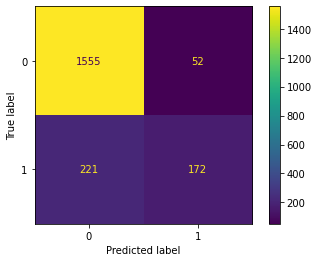

In [20]:
plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test)

In [21]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_classifiers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.768315,0.040287,0.038165,0.011001,XGBClassifier(n_classifiers=100),1,100,{'classifier': XGBClassifier(n_classifiers=100...,0.839959,0.820809,0.836369,0.835048,0.830039,0.832445,0.006631,9
1,0.739829,0.031243,0.039783,0.008693,XGBClassifier(n_classifiers=100),1,50,{'classifier': XGBClassifier(n_classifiers=100...,0.839959,0.820809,0.836369,0.835048,0.830039,0.832445,0.006631,9
2,0.698273,0.034281,0.030451,0.001641,XGBClassifier(n_classifiers=100),1,20,{'classifier': XGBClassifier(n_classifiers=100...,0.839959,0.820809,0.836369,0.835048,0.830039,0.832445,0.006631,9
3,0.675170,0.010049,0.029438,0.001812,XGBClassifier(n_classifiers=100),1,5,{'classifier': XGBClassifier(n_classifiers=100...,0.839959,0.820809,0.836369,0.835048,0.830039,0.832445,0.006631,9
4,1.082239,0.031744,0.031825,0.000974,XGBClassifier(n_classifiers=100),2,100,{'classifier': XGBClassifier(n_classifiers=100...,0.852177,0.836537,0.858389,0.850924,0.853064,0.850218,0.007299,5
5,1.078196,0.017723,0.032313,0.001822,XGBClassifier(n_classifiers=100),2,50,{'classifier': XGBClassifier(n_classifiers=100...,0.852177,0.836537,0.858389,0.850924,0.853064,0.850218,0.007299,5
6,1.068752,0.016235,0.033363,0.000889,XGBClassifier(n_classifiers=100),2,20,{'classifier': XGBClassifier(n_classifiers=100...,0.852177,0.836537,0.858389,0.850924,0.853064,0.850218,0.007299,5
7,1.061563,0.010520,0.038481,0.006897,XGBClassifier(n_classifiers=100),2,5,{'classifier': XGBClassifier(n_classifiers=100...,0.852177,0.836537,0.858389,0.850924,0.853064,0.850218,0.007299,5
8,1.615399,0.057054,0.035078,0.001134,XGBClassifier(n_classifiers=100),3,100,{'classifier': XGBClassifier(n_classifiers=100...,0.862420,0.849180,0.864606,0.854861,0.862319,0.858677,0.005782,1
9,1.589636,0.049870,0.038246,0.005965,XGBClassifier(n_classifiers=100),3,50,{'classifier': XGBClassifier(n_classifiers=100...,0.862420,0.849180,0.864606,0.854861,0.862319,0.858677,0.005782,1
